#### Parameter Interdependance

This code implements a broad grid search for each parameter (or combination if interdependant) seperately. Then, if necessary, we repeat the grid searh, narrowing in on the minimum error and run time combinations. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [2]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
test_cases = 10
lineages = 15

# To pass into the test function
kwargs = {
    'cnn_model_path': cnn_model_path,
    'masked_sequence': masked_sequence,
    'target_expressions': target_expressions,
    'precision': precision,
    'verbose': verbose,
    'lineages': lineages
}

# Parameters for full factorial design testing
param_ranges = {
    'generations' : np.linspace(50, 500, test_cases, dtype=int),
    'pop_size' : np.linspace(50, 500, test_cases, dtype=int),
}

Processing combinations: 100%|██████████| 450/450 [35:59<00:00,  4.80s/it, Elapsed=35.99min, ETA=0.00s]  


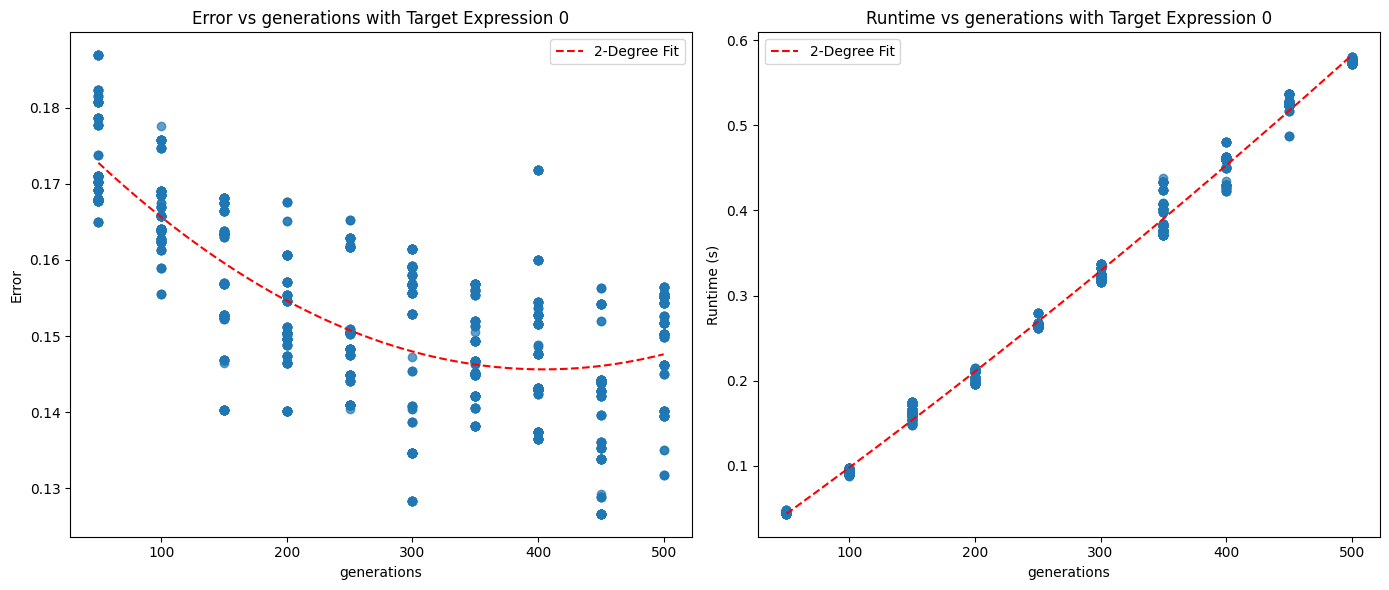

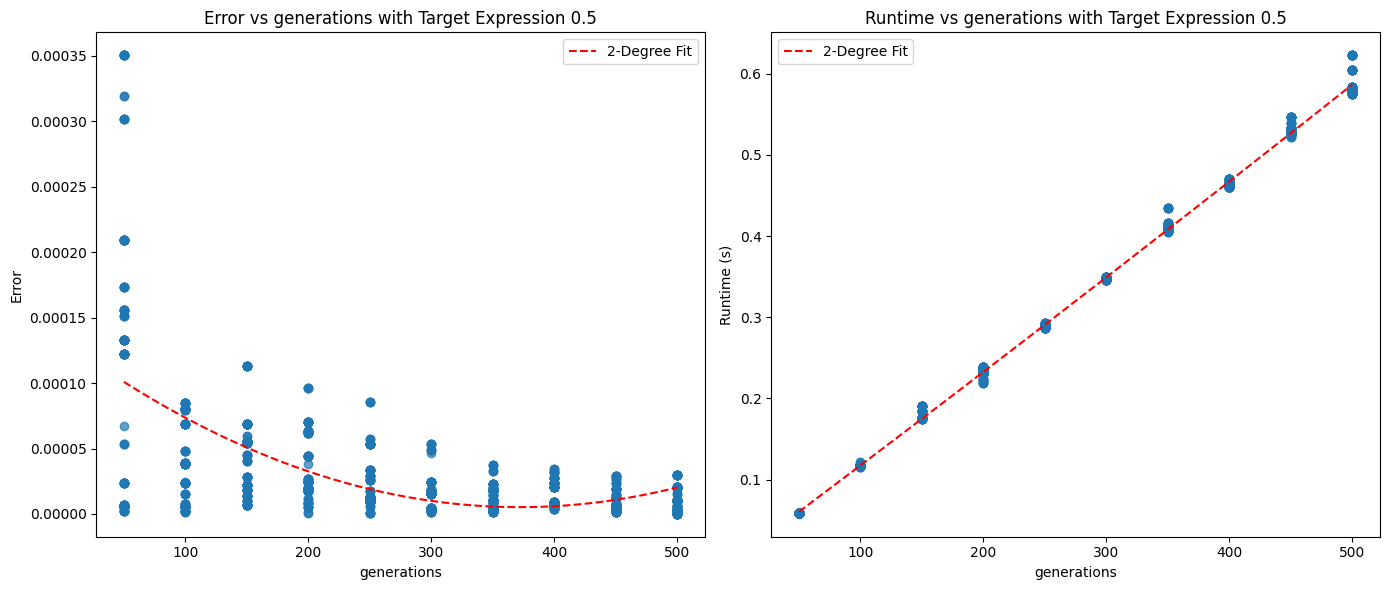

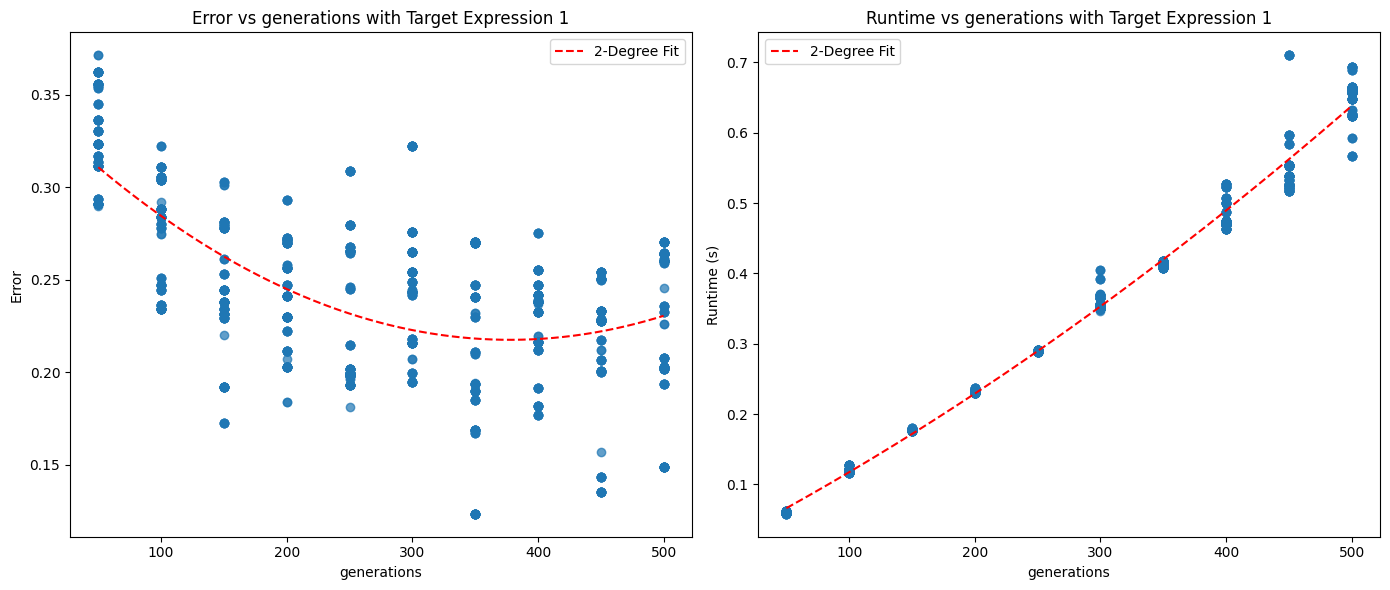

In [3]:
# Find optimal generations

results_df = test_params(param_ranges['generations'], 'generations', **kwargs)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'generations', polynomial_degree=2)

Processing combinations:   0%|          | 0/450 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 450/450 [1:19:23<00:00, 10.59s/it, Elapsed=79.40min, ETA=0.00s]   


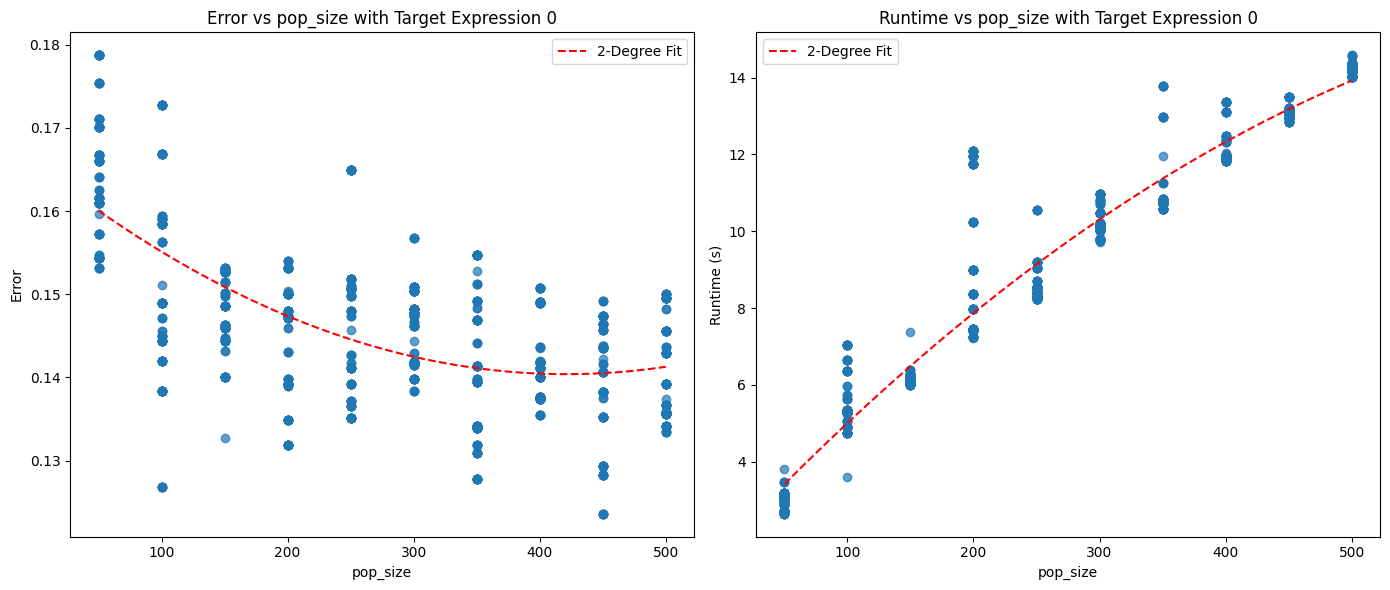

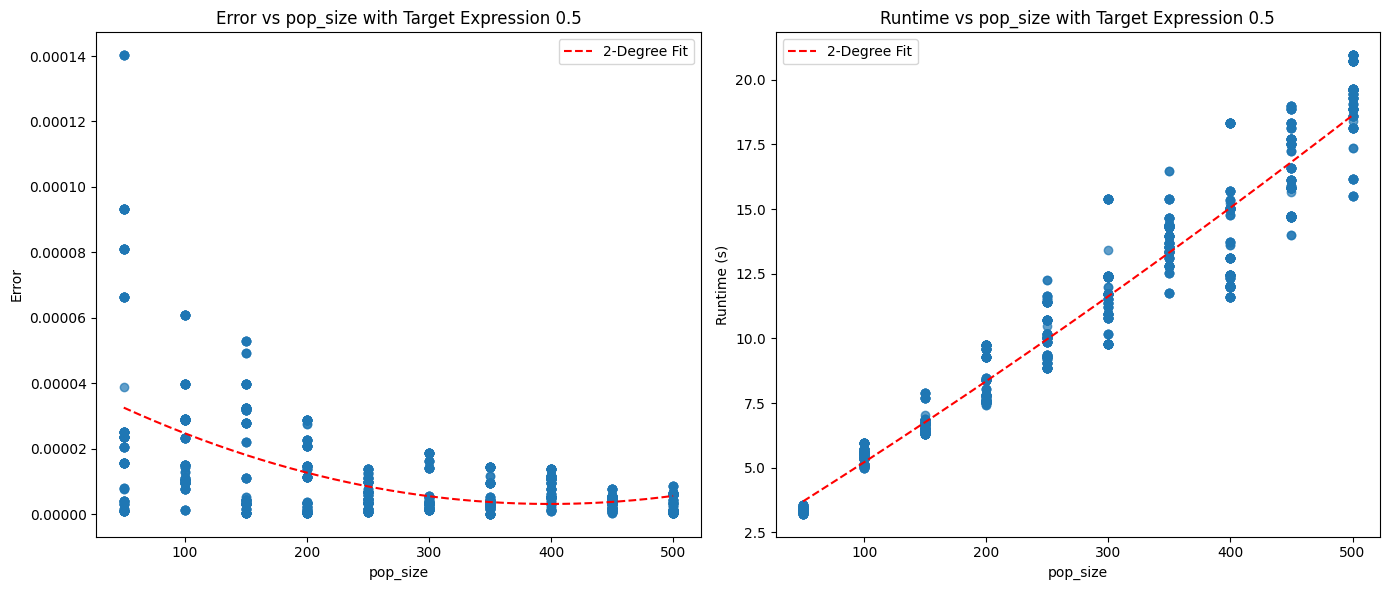

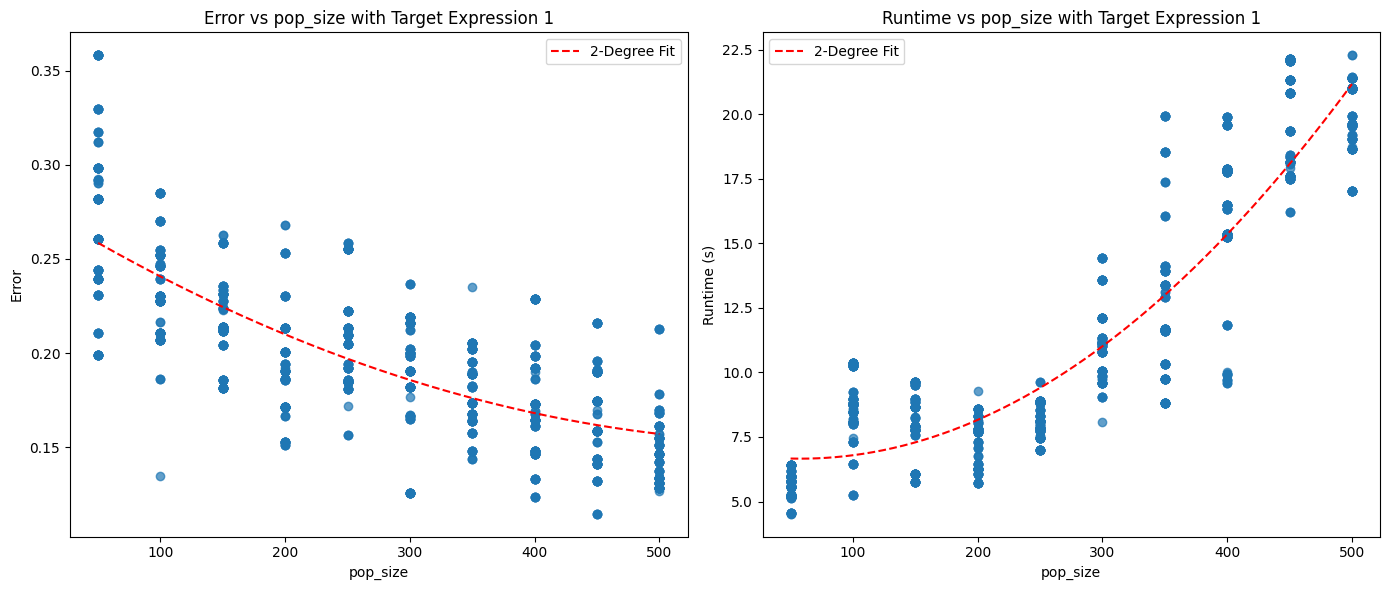

In [3]:
# Find optimal population size

results_df = test_params(param_ranges['pop_size'], 'pop_size', **kwargs)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'pop_size', polynomial_degree=2)